In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

In [4]:
#This notebook is designed for generating avg plots across all datasets

In [5]:
data_path= ""
df = pd.read_csv(data_path + "experiments_tr_sample_num_total_tr_samples_metrics.csv", index_col=0)

In [6]:
order_dict = {
    "SAR": 1,
    "SAR2": 2,
    "SHR": 3,
    
    "KOP": 4,
    "NAR": 5,
    "BERT": 6
    
}

In [7]:
df["order"] = df.method.apply(lambda x: order_dict[x])

In [8]:
df = df.rename(columns={'method': 'Method'})
df.loc[df['Method'].isin(['KOP', 'SAE', 'SAR3', 'NAR']), 'Method type'] = 'similarity-based' 
df.loc[df['Method'].isin(['BERT', 'SAR', 'SAR2', 'SHR']), 'Method type'] = 'classification' 
df.head()

,num_authors,type,Method,num_training,train_path,test_path,top_1,top_5,top_10,top_100,auroc_1,auroc_2,auroc_3,tpr,fpr,order,Method type
4a6c7ef6-a399-45c2-9b89-4e119f6a8b3f,100,intra_context,SAR,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.01,0.04,0.10,1.0,NaN,NaN,NaN,NaN,NaN,1,classification
42ae30d2-570b-41e2-aca7-0cdc4529a81d,100,cross_context,SAR,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.00,0.00,0.00,1.0,NaN,NaN,NaN,NaN,NaN,1,classification
4c79766d-4f9b-441b-9ea7-c97565ea81cf,100,intra_context,SAR,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.02,0.10,0.16,1.0,NaN,NaN,NaN,NaN,NaN,1,classification
32aa6fd9-c9ef-4b39-9621-8b39e2b11fb0,100,cross_context,SAR,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.00,0.00,0.00,1.0,NaN,NaN,NaN,NaN,NaN,1,classification
4e3ded62-4093-49f7-9e71-4056ecf18e2c,100,intra_context,SAR,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.02,0.08,0.14,1.0,NaN,NaN,NaN,NaN,NaN,1,classification


In [9]:
var_train_intra = df[(df.type == "intra_context") & (df.num_authors == 100)]#& (df.test_path==train_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()

var_train_intra = var_train_intra.sort_values(by="order")

var_train_cross = df[(df.type == "cross_context") & (df.num_authors == 100) ]#& (df.test_path==test_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()

var_train_cross = var_train_cross.sort_values(by="order")

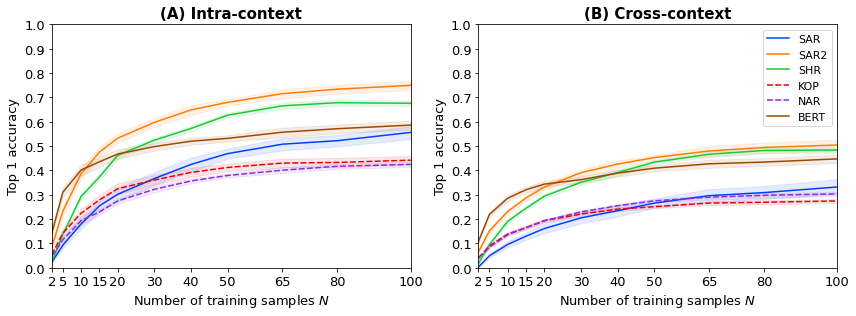

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12, 4.5)) 
#fig, axes = plt.subplots(2,1, figsize=(5, 12)) 

plt.xlim([2, 110])
plt.ylim([0, None])

#palette = sns.color_palette([color_dict[x] for x in var_train_cross.Method.unique()])
#palette = sns.mpl_palette("Set1", 8)
#print(palette)
#palette[5] = (0.9, 0.9, 0)
palette = sns.color_palette("bright", 6)
sns.set_palette(palette)

# Intra-context AA.
sns.lineplot(x='num_training', y='top_1', ax=axes[0], 
                 data=var_train_intra[var_train_intra.num_training <101].reset_index().sort_values(['order']), 
                 hue="Method",
                 style='Method type',
                 #ci="sd",
                 err_kws={'alpha': 0.1}, 
                 seed=0)
# Cross-context AA.
sns.lineplot(x='num_training', y='top_1', ax=axes[1], 
                 data=var_train_cross[var_train_cross.num_training <101].reset_index().sort_values(['order']), 
                 hue="Method",
                 style='Method type',
                 #ci="sd",
                 err_kws={'alpha': 0.1}, 
                 seed=0)

xticks = [2, 5, 10, 15, 20, 30, 40, 50, 65, 80, 100]
#xticks = [2, 5, 10, 15, 20, 30, 40, 50]
yticks = np.arange(0, 1.01, 0.1)

axes[0].set_title('(A) Intra-context', fontsize=15, fontweight='bold')
axes[1].set_title('(B) Cross-context', fontsize=15, fontweight='bold')

for ax in axes:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontdict={'fontsize':13})
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{yt:.1f}' for yt in yticks], fontdict={'fontsize':13})    
    ax.set_xlim(2, 100)
    #ax.set_xlim(2, 50)
    ax.set_ylim([0, 1])
    ax.set_ylabel('Top 1 accuracy', fontsize=13)
    ax.set_xlabel('Number of training samples $N$', fontsize=13)

axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[1].legend(title = "", fontsize=13, bbox_to_anchor=(1.1, 1))

plt.legend(labels = ['SAR', 'SAR2', 'SHR', 'KOP', 'NAR', 'BERT'], fontsize = 11)
plt.tight_layout()
plt.savefig("1-increasing-training-data-"+ 'avg' + ".jpg")
plt.show()

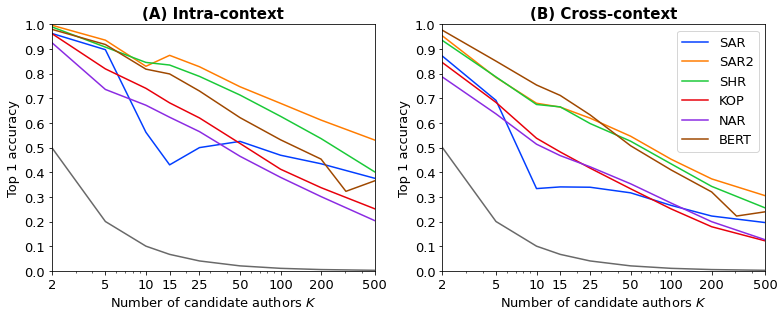

In [12]:
var_authors_intra = df[(df.type == "intra_context") & (df.num_training == 50)  & (df.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()



var_authors_cross = df[(df.type == "cross_context") & (df.num_training == 50)  & (df.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()



#palette = sns.color_palette("bright", 6)
sns.set_palette(palette)

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))

#xticks = [2, 5, 10, 15, 25, 50, 100, 200, 500, 1000, 2000, 5000]
xticks = [2, 5, 10, 15, 25, 50, 100, 200, 500]
#xticks = [10, 15, 25, 50, 100, 200, 500]
sns.lineplot(x='num_authors', y='top_1',
             ax=axes[0],
             data=var_authors_intra.reset_index().sort_values(['order']), 
             hue="Method", 
             #style='Method',
             ci="sd",
             markers=True,
            legend=None)

sns.lineplot(x='num_authors', y='top_1',
             ax=axes[1],
             data=var_authors_cross.reset_index().sort_values(['order']), 
             hue="Method", 
             #style='Method',
             ci="sd",
             markers=True)

#xticklabels = ['2', '5', '10', '15', '25', '50', '100', '200', '500', '1k', '2k', '5k']
xticklabels = ['2', '5', '10', '15', '25', '50', '100', '200', '500']
#xticklabels = ['10', '15', '25', '50', '100', '200', '500']
yticks = np.arange(0, 1.01, 0.1)


for ax in axes:
    ax.plot(xticks, [1.0/x for x in xticks], color='dimgray')
    ax.set_xlabel('Number of candidate authors $K$', fontsize=13)
    ax.set_xscale('log')
    #ax.set_xlim(2, 2000)
    #ax.set_xlim(2, 500)
    ax.set_xlim(2, 500)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontdict={'fontsize':13})
    ax.set_ylabel('Top 1 accuracy', fontsize=13)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{yt:.1f}' for yt in yticks], fontdict={'fontsize':13})    
    ax.set_ylim([0, 1])

axes[0].set_title('(A) Intra-context', fontsize=15, fontweight='bold')
axes[1].set_title('(B) Cross-context', fontsize=15, fontweight='bold')

from matplotlib.lines import Line2D
handles, labels = axes[1].get_legend_handles_labels()
line = Line2D([0], [0], label='Random', color='dimgray')
handles.extend([line])
axes[1].legend(handles=handles, fontsize=11.5)
plt.legend(labels = ['SAR', 'SAR2', 'SHR', 'KOP', 'NAR', 'BERT'], fontsize = 13)
plt.tight_layout()
plt.savefig("2-increasing-number-authors-top1-" + 'avg' + ".jpg", bbox_inches='tight')
plt.show()